In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy

In [3]:
import simulation_code.simulate_des_maps
import os
import mf
import cl
os.environ['PATH'] = "/Users/jzuntz/src/nisha/flask/bin:" + os.environ['PATH']

Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you have changed tracer cross-correlations to 0
Nisha, you

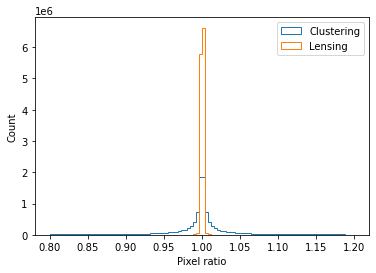

In [4]:
nside = 1024

cmaps1, lmaps1 = simulation_code.simulate_des_maps.simulate_des_maps_bias(
    omega_b=0.048,
    omega_m=0.3,
    h=0.7,
    n_s=0.96,
    sigma_8=0.8,
    b1=1.42,
    b2=1.65,
    b3=1.60,
    b4=1.92,
    b5=2.00,
    smoothing=5,
    nside=nside,
)

# same but scaling
cmaps2, lmaps2 = simulation_code.simulate_des_maps.simulate_des_maps_bias(
    omega_b=0.048,
    omega_m=0.3 * (1 + 1e-3),   # multitply by 1.001
    h=0.7,
    n_s=0.96,
    sigma_8=0.8,
    b1=1.42,
    b2=1.65,
    b3=1.60,
    b4=1.92,
    b5=2.00,
    smoothing=5,
    nside=nside,
)
hist(cmaps2[0]/cmaps1[0], range=(0.8,1.2), bins=100, histtype='step', label="Clustering")
hist(lmaps2[0]/lmaps1[0], range=(0.8,1.2), bins=100, histtype='step', label="Lensing")
xlabel("Pixel ratio")
ylabel("Count")
legend();


In [5]:
f = 12*nside**2

# This takes many minutes on my machine

v1, V0_1, V1_1, V2_1 = mf.calc_mf_2maps(cmaps1,lmaps1,10,f)
v2, V0_2, V1_2, V2_2 = mf.calc_mf_2maps(cmaps2,lmaps2,10,f)
cl1 = cl.Cl_2maps(cmaps1,lmaps1,nside,f)
cl2 = cl.Cl_2maps(cmaps2,lmaps2,nside,f)

In [6]:
sims = np.load('all_s5_n1024_t10_f1_MF+Cl_c+l.npy')

In [7]:
output1 = np.concatenate((V0_1.flatten(),V1_1.flatten(),V2_1.flatten(),cl1.flatten()))
output2 = np.concatenate((V0_2.flatten(),V1_2.flatten(),V2_2.flatten(),cl2.flatten()))

In [8]:
mu = sims.mean(axis=0)
C = cov(sims.T)
invC = np.linalg.inv(C)

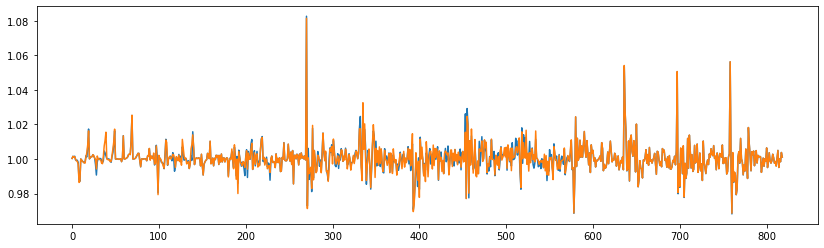

In [10]:
# make plot compared to one simulation
figure(figsize=(14,4))
sim = sims[0]
plot(output1/sim)
plot(output2/sim)

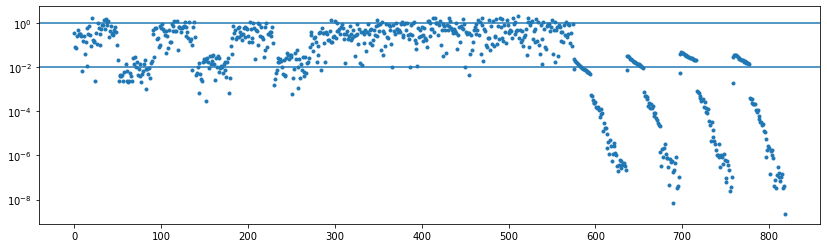

In [11]:
# make plot compared to covariance
figure(figsize=(14,4))
semilogy(abs(output1 - output2)/ C.diagonal()**0.5, '.')
axhline(1e-2)
axhline(1)